In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision

# Implementing a Multilayer Perceptron

* In this lab session, you will use high-level PyTorch functionalities to implement multilayer perceptrons for classification.

* You will also experiment with different hyperparameters and observe the results.

* You will use the [fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which is composed of labeled images of clothes and accessories.

* The following function is used to load the dataset. You don't need to understand it for now.

In [2]:
# You don't need to understand this function for now.
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load it into memory."""
    trans = [torchvision.transforms.ToTensor()]
    if resize:
        trans.insert(0, torchvision.transforms.Resize(resize))
    trans = torchvision.transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (torch.utils.data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=2),
            torch.utils.data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=2))

In [3]:
batch_size = 256 # Defines the batch size
train_iter, test_iter = load_data_fashion_mnist(batch_size) # Loads the fashion MNIST dataset. `train_iter` and `test_iter` are `DataLoader` objects.

In [4]:
X, y = next(iter(train_iter)) # Requests the first training batch
print(X.size()) # 256 images per batch. Each image is represented by a 1 x 28 x 28 tensor (number of channels x height x width). The images are grayscale, so there is a single channel.
print(y.size()) # 256 targets. Each target is a number between 0 and 9. The classification problem has 10 clases.

torch.Size([256, 1, 28, 28])
torch.Size([256])


* The following code displays some images from the first training batch.

In [5]:
from google.colab.patches import cv2_imshow

class_labels = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot'] # Pre-defined class labels

for i in range(3):
    print(f'\nImage {i} ({class_labels[int(y[i])]}):\n') # Prints the index `i` and the label associated to the `i`-th image.
    cv2_imshow(X[i].numpy().transpose(1, 2, 0) * 255) # Converts and displays the `i`-th image in the batch.


Image 0 (boot):




Image 1 (sneaker):




Image 2 (boot):



## Softmax Regression Model

* We have already implemented softmax regression for this classification task. We will use that implementation as a starting point for our multilayer perceptron implementation.

* The following steps are involved in our previous implementation of a softmax regression model, which is presented below.

* Each image is a rank 3 tensor with $1 \cdot 28 \cdot 28 = 784$ elements. We *flatten* each image into a $784$-dimensional vector (observation).

* Because the fashion MNIST dataset has $10$ classes, the softmax regression model outputs a $10$-dimensional vector.

* Therefore, we need a weight matrix $\mathbf{W} \in \mathbb{R}^{784 \times 10}$ and a bias vector $\mathbf{b} \in \mathbb{R}^{10 \times 1}$.

* We initialize the weight matrix using samples from a normal distribution and the bias vector to zero.

* We compute the logit matrix $\mathbf{O}$ inside a subclass of `torch.nn.Module`. This is how neural networks are typically implemented in PyTorch.

* The class `torch.nn.Module` requires implementing the method `forward`, which should define the forward pass for a batch of observations.

In [6]:
class SoftmaxRegression(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(SoftmaxRegression, self).__init__() # Initializes superclass

        self.num_inputs = num_inputs
        self.num_outputs = num_outputs

        self.Linear1 = torch.nn.Linear(num_inputs, num_outputs) # Creates a linear layer

        torch.nn.init.normal_(self.Linear1.weight, std=0.01) # Initializes the weight matrix
        torch.nn.init.zeros_(self.Linear1.bias) # Initializes the bias vector

    def forward(self, x):
        x = x.view(-1, self.num_inputs) # Reshapes the (`batch_size`, 1, 28, 28) batch of images `x` into a (`batch_size`, 784) batch of observations `x`
        out = self.Linear1(x) # A linear layer multiplies `x` by a weight matrix and adds a bias vector (to each row, using broadcasting)
        return out # Returns a (`batch_size`, 10) logits matrix

num_inputs = 784 # Number of features (inputs)
num_outputs = 10 # Number of classes (outputs)
sr = SoftmaxRegression(num_inputs, num_outputs)
print(sr)

SoftmaxRegression(
  (Linear1): Linear(in_features=784, out_features=10, bias=True)
)


## Task 1

* Use the code presented below as a starting point for implementing a multilayer perceptron. You should use the softmax regression implementation as a reference in order to fill the lines labeled with `TODO`.

* The multilayer perceptron should have one hidden layer composed of `num_hidden` units. The first layer should have a $\text{ReLU}$ activation function. The second layer should not have an activation function.

In [7]:
class Net(torch.nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super(Net, self).__init__() # Initializes superclass

        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs

        self.Linear1 = torch.nn.Linear(num_inputs, num_hidden) # TODO: Create the first layer, with `num_inputs` inputs and `num_hidden` outputs
        self.relu = torch.nn.ReLU() # Creates the activation function
        self.Linear2 = torch.nn.Linear(num_hidden, num_outputs) # TODO: Create the second layer, with `num_hidden` inputs and `num_outputs` outputs

        torch.nn.init.normal_(self.Linear1.weight, std=0.01) #TODO: Initialize the weight matrix for the first layer
        torch.nn.init.zeros_(self.Linear1.bias) # TODO: Initialize the bias vector for the first layer

        torch.nn.init.normal_(self.Linear2.weight, std=0.01) #TODO: Initialize the weight matrix for the second layer
        torch.nn.init.zeros_(self.Linear2.bias) # TODO: Initialize the bias vector for the second layer

    def forward(self, x):
        x = x.view(-1, self.num_inputs) # Reshapes the (`batch_size`, 1, 28, 28) batch of images `x` into a (`batch_size`, 784) batch of observations `x`

        x = self.Linear1(x) # TODO: Apply the first linear layer, which multiplies `x` by a weight matrix and add a bias vector (to each row, using broadcasting)
        x = self.relu(x) # TODO: Apply the activation function `self.relu` to `x`
        x = self.Linear2(x) # TODO: Apply the second linear layer, which multiplies `x` by a weight matrix and add a bias vector (to each row, using broadcasting)

        return x # Returns a (`batch_size`, 10) logits matrix

num_inputs = 784  # Number of features (inputs)
num_hidden = 256  # Number of hidden units
num_outputs = 10  # Number of classes (outputs)
net = Net(num_inputs, num_hidden, num_outputs)
print(net)

Net(
  (Linear1): Linear(in_features=784, out_features=256, bias=True)
  (relu): ReLU()
  (Linear2): Linear(in_features=256, out_features=10, bias=True)
)


## Loss function

* The *neural network* defined above computes the logits matrix $\mathbf{O}$, not the prediction matrix $\mathbf{\hat{Y}} = \text{softmax}(\mathbf{O})$.

* This is because PyTorch provides a class called `CrossEntropyLoss` that implements the desired cross entropy loss but requires a logits matrix $\mathbf{O}$ instead of the prediction matrix $\mathbf{\hat{Y}}$.

* The class `CrossEntropyLoss` implements the cross entropy loss in a way that avoids numerical instabilities that would result from a naive implementation.

In [8]:
loss = torch.nn.CrossEntropyLoss()

## Optimization Algorithm

* We will employ minibatch stochastic gradient descent with a learning rate of $0.1$ as the optimization algorithm.

* Because we implemented a subclass of `torch.nn.Module`, the model parameters can be accessed through the method `parameters`.

In [9]:
lr = 0.1
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

## Evaluation

* Recall that the highest element of a logits vector determines which class will be predicted.

* We can use this to compute the number of correct predictions per batch.

In [10]:
def correct(logits, y):
    y_hat = logits.argmax(axis=1) # Finds the column with the highest value for each row of `logits`.
    return (y_hat == y).float().sum() # Computes the number of times that `y_hat` and `y` match.

# Example: 1 correct classification,
y = torch.tensor([2, 1])
logits = torch.tensor([[0.1, 0.3, 0.6], [0.5, 0.2, 0.3]])
print(correct(logits, y))

tensor(1.)


* We can use the previous function to compute the accuracy of our model in a given dataset by accumulating the number of correct predictions across batches and then dividing that number by the number of examples in the dataset.

In [11]:
def evaluate_metric(net, data_iter, metric):
    """Compute the average `metric` of the model on a dataset."""
    c = torch.tensor(0.)
    n = torch.tensor(0.)
    for X, y in data_iter:
        logits = net(X)
        c += metric(logits, y)
        n += len(y)

    return c / n

In [12]:
print(f'Training accuracy: {evaluate_metric(net, train_iter, correct)}. Testing accuracy: {evaluate_metric(net, test_iter, correct)}.')

Training accuracy: 0.070783331990242. Testing accuracy: 0.07320000231266022.


## Training

* The following code implements the training loop for the multilayer perceptron.

* The training/testing dataset accuracy is displayed after each epoch and stored for plotting.

* **Important:** it is a methodological mistake to compute performance metrics on the *testing* dataset for the purposes of hyperparameter tuning. A *validation* dataset should be used for that purpose, even if it requires splitting the original training dataset into a training dataset and a validation dataset. The *test* dataset should only be used to evaluate the performance of the final set of hyperparameters, in order to assess generalization.


Epoch 1/60.
Training accuracy: 0.748199999332428. Testing accuracy: 0.734499990940094.

Epoch 2/60.
Training accuracy: 0.8030333518981934. Testing accuracy: 0.7936999797821045.

Epoch 3/60.
Training accuracy: 0.8264999985694885. Testing accuracy: 0.8108000159263611.

Epoch 4/60.
Training accuracy: 0.8319666385650635. Testing accuracy: 0.8205000162124634.

Epoch 5/60.
Training accuracy: 0.8353833556175232. Testing accuracy: 0.8238000273704529.

Epoch 6/60.
Training accuracy: 0.8501999974250793. Testing accuracy: 0.8339999914169312.

Epoch 7/60.
Training accuracy: 0.8483833074569702. Testing accuracy: 0.8324999809265137.

Epoch 8/60.
Training accuracy: 0.8489166498184204. Testing accuracy: 0.8345999717712402.

Epoch 9/60.
Training accuracy: 0.8659499883651733. Testing accuracy: 0.8468000292778015.

Epoch 10/60.
Training accuracy: 0.8457666635513306. Testing accuracy: 0.8310999870300293.

Epoch 11/60.
Training accuracy: 0.845883309841156. Testing accuracy: 0.8321999907493591.

Epoch 12/6

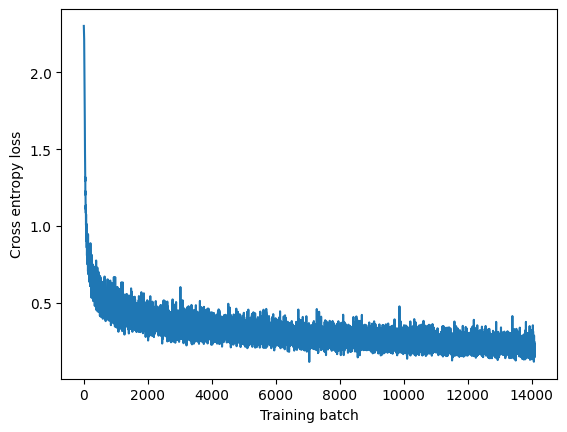

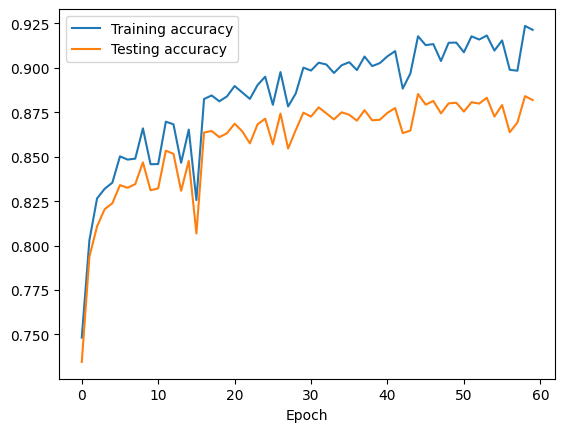

In [13]:
losses = [] # Stores the loss for each training batch
train_accs = [] # Stores the training accuracy after each epoch
test_accs = [] # Stores the testing accuracy after each epoch

num_epochs = 60
for epoch in range(num_epochs):
    print(f'\nEpoch {epoch + 1}/{num_epochs}.')
    for X, y in train_iter:
        logits = net(X) # Computes the logits for the batch of images `X`

        l = loss(logits, y) # Computes the loss given the `logits` and the class vector `y`
        optimizer.zero_grad() # Zeroes the gradients stored in the model parameters
        l.backward() # Computes the gradient of the loss `l` with respect to the model parameters

        optimizer.step() # Updates the model parameters based on the gradients stored inside them

        losses.append(float(l)) # Stores the loss for this batch

    with torch.no_grad(): # Computing performance metrics does not require gradients
        train_accs.append(evaluate_metric(net, train_iter, correct))
        test_accs.append(evaluate_metric(net, test_iter, correct))
        print(f'Training accuracy: {train_accs[-1]}. Testing accuracy: {test_accs[-1]}.') # Computes and displays training/testing dataset accuracy.

plt.plot(losses) # Plots the loss for each training batch
plt.xlabel('Training batch')
plt.ylabel('Cross entropy loss')
plt.show()

plt.plot(train_accs, label='Training accuracy')
plt.plot(test_accs, label='Testing accuracy')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.show()

## Task 2

* You will now experiment with different hyperparameters and observe the results.

* Test a few alternatives for the following hyperparameters and observe the impact on model performance:
    * Number of epochs: 20, 60.
    * Number of hidden units: 128, 256, 512.
    * Learning rate: 0.5, 0.9, 0.01.
    * Activation function: $\text{ReLU}$, $\text{sigmoid}$.
    * Standard deviation for weight initialization (`std`): 0.0, 0.1, 1.0.

* Note that the performance of the model depends on **combinations** of hyperparameters. Therefore, whether a hyperparameter achieves high performance depends on the remaining hyperparameters.

* Finding good hyperparameters generally requires trying all possible combinations of hyperparameters (where each hyperparameter is only allowed to be one of a few alternatives). Using the alternatives listed above, this would require testing $2 \cdot 3 \cdot 3 \cdot 2 \cdot 3 = 108$ combinations.